In [43]:
import pandas as pd
import numpy as np
import math
import mpmath
import matplotlib.pyplot as plt

# TRAINNING ANALYSIS

In [144]:
result_ql_train = pd.read_csv('../logs/ql/result_ql_train_gamma_0.99.log',
                    sep=',', 
                    names=["lamb", "sample", "episode", "rewards", "safe_points"])

In [167]:
result_ql_train

,lamb,sample,episode,rewards,safe_points
0,-1.0,1,1,-5018,8
1,-1.0,1,2,-2328,9
2,-1.0,1,3,-533,6
3,-1.0,1,4,-111,7
4,-1.0,1,5,-70,7
...,...,...,...,...,...
224995,1.0,50,296,-260,1
224996,1.0,50,297,-203,1
224997,1.0,50,298,-43,1
224998,1.0,50,299,-97,1


In [146]:
result_ql_train_group = result_ql_train.groupby(['episode', 'lamb'])
result_ql_train_grouped = result_ql_train_group.agg({'rewards': ['mean', 'var'], 'safe_points': ['mean', 'var']})
result_ql_train_grouped = result_ql_train_grouped.reset_index()
#result_ql_train_grouped.pivot_table('rewards', ['episode'], 'lamb')
result_ql_train_grouped

episode  lamb  rewards               safe_points          
                       mean           var        mean       var
0          1 -1.00 -4617.22  7.666253e+05        7.96  4.692245
1          1 -0.75 -4344.34  1.158200e+06        7.60  5.265306
2          1 -0.50 -4852.14  3.820268e+05        1.22  4.052653
3          1 -0.40 -4361.08  1.265260e+06        7.32  5.650612
4          1 -0.30 -4742.72  6.428399e+05        0.68  0.997551
...      ...   ...      ...           ...         ...       ...
4495     300  0.30   -59.82  3.334640e+03        2.20  0.408163
4496     300  0.40   -63.58  2.164289e+03        1.86  0.326939
4497     300  0.50   -97.26  9.939013e+03        1.76  0.267755
4498     300  0.75  -114.44  8.053353e+03        1.30  0.214286
4499     300  1.00  -125.86  1.240743e+04        1.10  0.091837

[4500 rows x 6 columns]

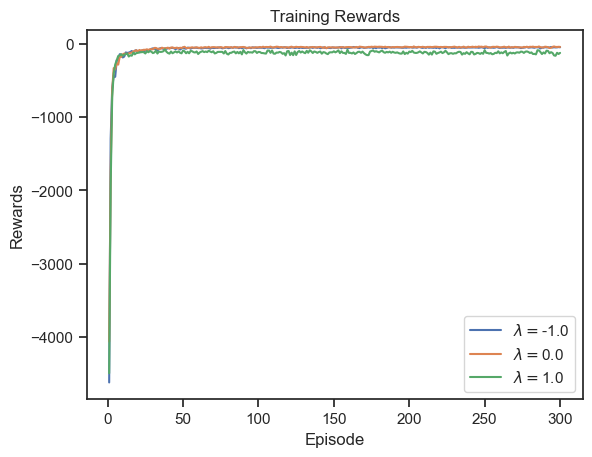

In [147]:
lambs = result_ql_train['lamb'].unique()
lambs = [-1.0, 0.0, 1.0]

for lamb in lambs:
    
    df = result_ql_train[result_ql_train['lamb'] == lamb].groupby('episode').mean().reset_index()
    sd = result_ql_train[result_ql_train['lamb'] == lamb].groupby('episode').std().reset_index()['rewards']
    #df = df[df['episode'] <= 30]
    x = df['episode']
    y = df['rewards']
    plt.plot(x, y, label=r"$\lambda=${}".format(lamb))
    #plt.fill_between(x, (y-sd), (y+sd), facecolor='gold', alpha=0.5)
plt.legend()
plt.title('Training Rewards')
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.show()

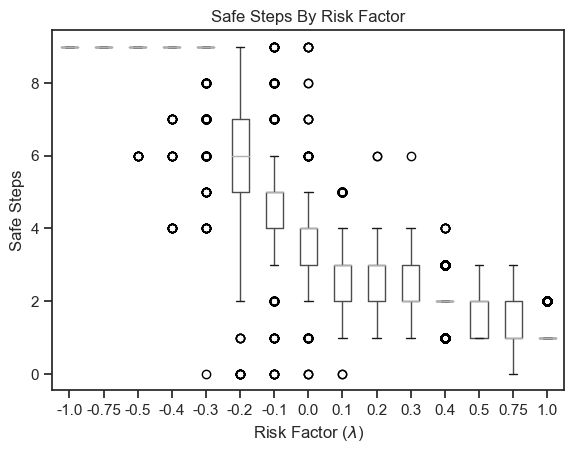

In [148]:
import warnings
warnings.filterwarnings('ignore')

result_ql_train[result_ql_train['episode'] > 250].rename(columns={"lamb": r"Risk Factor ($\lambda$)", "safe_points": "Safe Steps"}).boxplot(by=r"Risk Factor ($\lambda$)" , column='Safe Steps', grid=False)

plt.title('Safe Steps By Risk Factor')
plt.suptitle('')
plt.ylabel('Safe Steps')
plt.show()

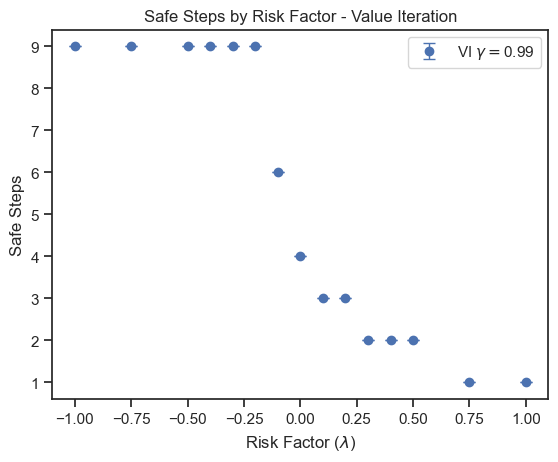

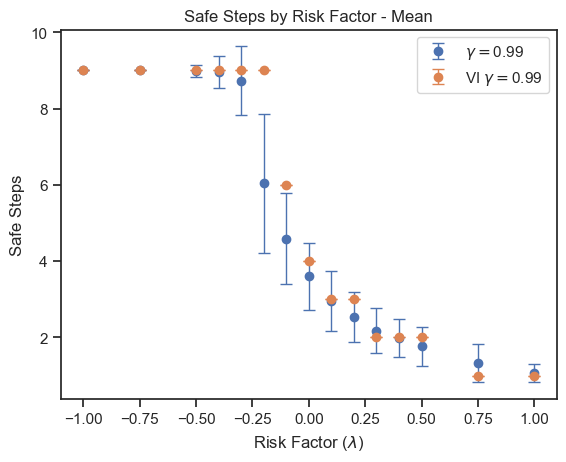

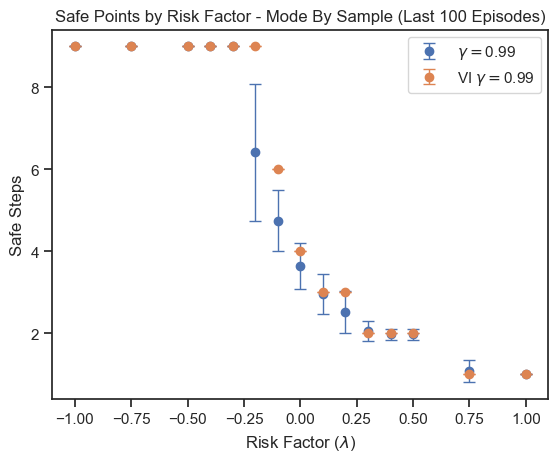

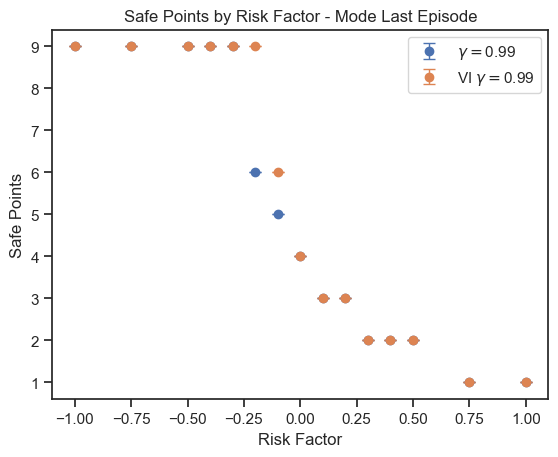

In [168]:

vi = {}
vi['0.95'] = [9,9,9,9,6,5,5,4,3,3,2,2,2,1,1]
vi['0.98'] = [9,9,9,9,9,9,5,4,3,3,2,2,2,1,1]
vi['0.99'] = [9,9,9,9,9,9,6,4,3,3,2,2,2,1,1] 

include_vi = True


data_load = [
    #{'file_path':'../logs/ql/result_ql_train_gamma_0.95.log','label':'0.95'},
    #{'file_path':'../logs/ql/result_ql_train_gamma_0.98.log','label':'0.98'},
    {'file_path':'../logs/ql/result_ql_train_gamma_0.99.log','label':'0.99'}
            ]

# Value Iteration
for d in data_load:
    datadf = pd.read_csv(d['file_path'],
                        sep=',', 
                        names=["lamb", "sample", "episode", "rewards", "safe_points"])
    df = datadf[datadf['episode'] > 200].groupby('lamb').mean().reset_index()
    sd = datadf[datadf['episode'] > 200].groupby('lamb').std().reset_index()['safe_points']*0
    x = df['lamb']
    plt.errorbar(x, vi[d['label']], sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"VI $\gamma=${}".format(d['label']))
    
    
plt.title('Safe Steps by Risk Factor - Value Iteration')
plt.xlabel(r"Risk Factor ($\lambda$)")
plt.ylabel('Safe Steps')

plt.legend()

plt.show()

for d in data_load:
    datadf = pd.read_csv(d['file_path'],
                        sep=',', 
                        names=["lamb", "sample", "episode", "rewards", "safe_points"])
    df = datadf[datadf['episode'] > 200].groupby('lamb').mean().reset_index()
    sd = datadf[datadf['episode'] > 200].groupby('lamb').std().reset_index()['safe_points']
    x = df['lamb']
    y = df['safe_points']
    #plt.errorbar(x, y, sd, linestyle='None', marker='.')
    plt.errorbar(x, y, sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"$\gamma=${}".format(d['label']))
    
# Value Iteration
if include_vi:
    for d in data_load:
        sd = datadf[datadf['episode'] > 200].groupby('lamb').std().reset_index()['safe_points']*0
        plt.errorbar(x, vi[d['label']], sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"VI $\gamma=${}".format(d['label']))
    
    
plt.title('Safe Steps by Risk Factor - Mean')
plt.xlabel(r"Risk Factor ($\lambda$)")
plt.ylabel('Safe Steps')

plt.legend()

plt.show()

# moda por amostra
for d in data_load:
    datadf = pd.read_csv(d['file_path'],
                        sep=',', 
                        names=["lamb", "sample", "episode", "rewards", "safe_points"])
    mode_df = datadf[datadf['episode'] > 200].groupby(['lamb', 'sample']).safe_points.apply(lambda x: x.mode()).reset_index()
    df = mode_df.groupby('lamb').mean().reset_index()
    sd = mode_df.groupby('lamb').std().reset_index()['safe_points']
    x = df['lamb']
    y = df['safe_points']
    #plt.errorbar(x, y, sd, linestyle='None', marker='.')
    plt.errorbar(x, y, sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"$\gamma=${}".format(d['label']))

# Value Iteration
if include_vi:
    for d in data_load:
        sd = datadf[datadf['episode'] > 200].groupby('lamb').std().reset_index()['safe_points']*0
        plt.errorbar(x, vi[d['label']], sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"VI $\gamma=${}".format(d['label']))
  
    
plt.title('Safe Points by Risk Factor - Mode By Sample (Last 100 Episodes)')
plt.xlabel(r"Risk Factor ($\lambda$)")
plt.ylabel('Safe Steps')

plt.legend()

plt.show()

#moda para por modelo - ultima execucao
for d in data_load:
    datadf = pd.read_csv(d['file_path'],
                        sep=',', 
                        names=["lamb", "sample", "episode", "rewards", "safe_points"])
    mode_df = datadf[datadf['episode'] == 300].groupby('lamb').safe_points.apply(lambda x: x.mode()).reset_index()
    df = mode_df.groupby('lamb').mean().reset_index()
    sd = mode_df.groupby('lamb').mean().reset_index()['safe_points']*0
    x = df['lamb']
    y = df['safe_points']
    #plt.errorbar(x, y, sd, linestyle='None', marker='.')
    
    plt.errorbar(x, y, sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"$\gamma=${}".format(d['label']))

# Value Iteration
if include_vi:
    for d in data_load:
        plt.errorbar(x, vi[d['label']], sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"VI $\gamma=${}".format(d['label']))
    
plt.title('Safe Points by Risk Factor - Mode Last Episode')
plt.xlabel('Risk Factor')
plt.ylabel('Safe Points')
plt.legend()
plt.show()

In [150]:
import seaborn as sns


datadf = pd.read_csv('../logs/ql/result_ql_train_gamma_0.99.log',
                        sep=',', 
                        names=["lamb", "sample", "episode", "rewards", "safe_points"])
datadf

,lamb,sample,episode,rewards,safe_points
0,-1.0,1,1,-5018,8
1,-1.0,1,2,-2328,9
2,-1.0,1,3,-533,6
3,-1.0,1,4,-111,7
4,-1.0,1,5,-70,7
...,...,...,...,...,...
224995,1.0,50,296,-260,1
224996,1.0,50,297,-203,1
224997,1.0,50,298,-43,1
224998,1.0,50,299,-97,1


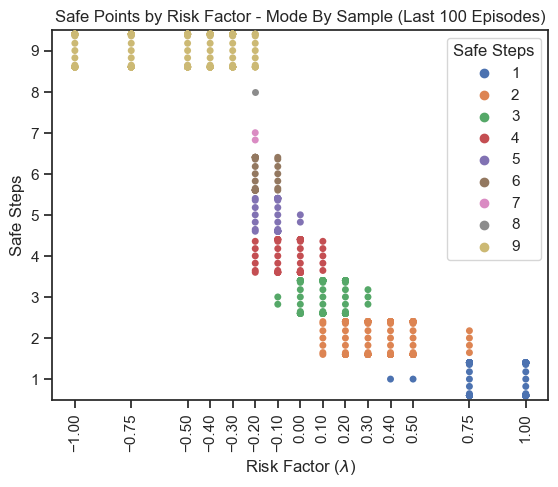

In [165]:
df = datadf[datadf['episode'] > 200].groupby(['lamb', 'sample']).safe_points.apply(lambda x: x.mode()).reset_index()
df = df.rename(columns={"lamb": r"Risk Factor ($\lambda$)", "safe_points": "Safe Steps"})

sns.swarmplot(data=df, order="987654321", y="Safe Steps", x="Risk Factor ($\lambda$)", hue="Safe Steps",dodge=False, palette="deep", legend=True, orient="h")

plt.xticks(df['Risk Factor ($\lambda$)'].unique(), rotation=90)

plt.title("Safe Points by Risk Factor - Mode By Sample (Last 100 Episodes)")
plt.show()



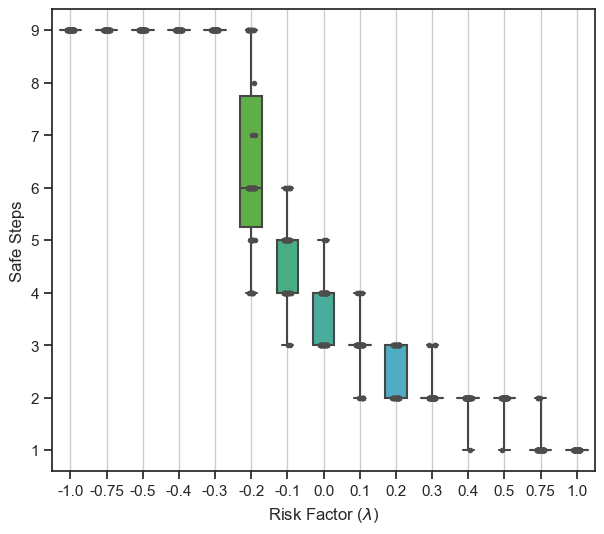

In [164]:
df = datadf[datadf['episode'] > 200].groupby(['lamb', 'sample']).safe_points.apply(lambda x: x.mode()).reset_index()
df = df.rename(columns={"lamb": r"Risk Factor ($\lambda$)", "safe_points": "Safe Steps"})

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Risk Factor ($\lambda$)", y="Safe Steps", data=df,
            whis=[0, 100], 
            width=.6)

# Add in points to show each observation
sns.stripplot(x="Risk Factor ($\lambda$)", y="Safe Steps", data=df,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
#ax.set(ylabel="")
#sns.despine(trim=True, left=True)

# RUNNING ANALYSIS

In [8]:
result_ql_run = pd.read_csv('../logs/ql/result_ql_run_gamma_0.99.log',
                    sep=',', 
                    names=["lamb", "sample","rewards"])
result_ql_run

,lamb,sample,rewards
0,-1.0,1,-26
1,-1.0,2,-26
2,-1.0,3,-26
3,-1.0,4,-26
4,-1.0,5,-26
...,...,...,...
14995,1.0,996,-29
14996,1.0,997,-28
14997,1.0,998,-94
14998,1.0,999,-98


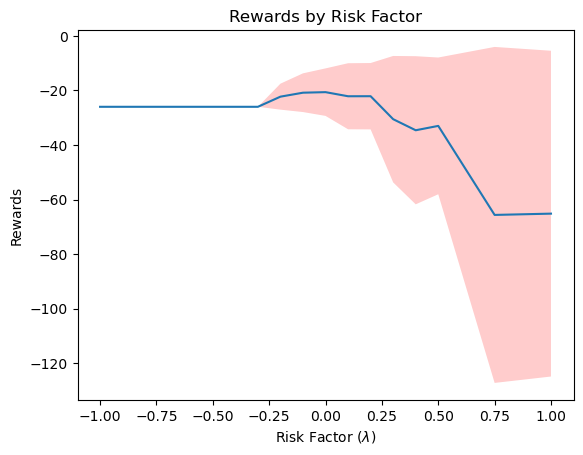

In [9]:
df = result_ql_run.groupby('lamb').mean().reset_index()
sd = result_ql_run.groupby('lamb').std().reset_index()['rewards']
x = df['lamb']
y = df['rewards']
plt.plot(x, y)
plt.fill_between(x, (y-sd), (y+sd), facecolor='red', alpha=0.2)
plt.title('Rewards by Risk Factor')
plt.xlabel(r"Risk Factor ($\lambda$)")
plt.ylabel('Rewards')
plt.show()

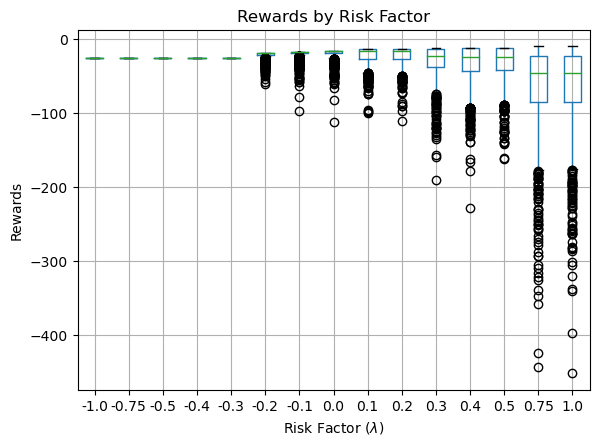

In [10]:
import warnings
warnings.filterwarnings('ignore')

result_ql_run.rename(columns={"lamb": r"Risk Factor ($\lambda$)", "rewards": "Rewards"}).boxplot(by=r"Risk Factor ($\lambda$)" , column='Rewards')

plt.title('Rewards by Risk Factor')
plt.suptitle('')
plt.ylabel('Rewards')
plt.show()

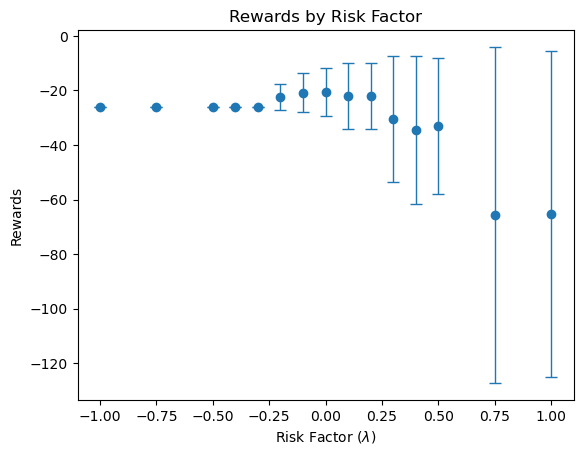

In [11]:
df = result_ql_run.groupby('lamb').mean().reset_index()
sd = result_ql_run.groupby('lamb').std().reset_index()['rewards']
x = df['lamb']
y = df['rewards']
#plt.errorbar(x, y, sd, linestyle='None', marker='.')
plt.errorbar(x, y, sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0)#, ecolor='red'
plt.title('Rewards by Risk Factor')
plt.xlabel(r"Risk Factor ($\lambda$)")
plt.ylabel('Rewards')
plt.show()

plt.show()

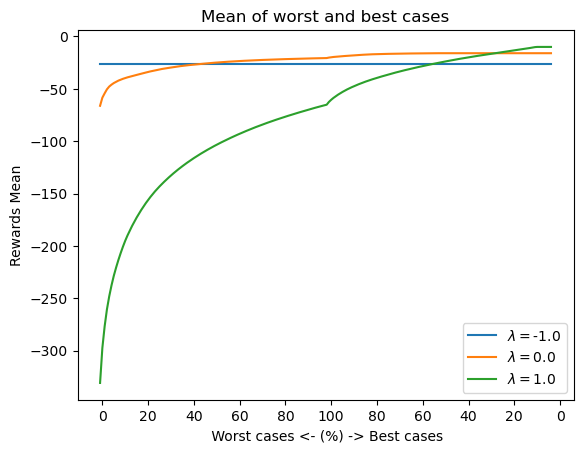

In [12]:
def calc_cvar_lower(scores_raw, pct):
    scores = list(scores_raw)
    scores.sort()
    return np.mean(scores[:int(len(scores)*pct*0.01)])

def plot_cvar_lower(results, lambs):
    label = '{}'
    
    for lamb in lambs:
        rewards = results[results['lamb'] == lamb]['rewards']
        cvar_values = []
        for cvar_key in range(1,100):
            cvar_values.append(calc_cvar_lower(rewards, cvar_key))
        plt.plot(cvar_values, label=label.format(lamb))

    #plt.title(title)
    plt.xlabel('%')
    #plt.xticks(range(1,100,20), range(1,100,20))
    plt.ylabel('Mean of worst cases')
    plt.legend();
    #plt.savefig(fig)
    plt.show()
    
    
def calc_cvar_greater(scores_raw, pct):
    scores = list(scores_raw)
    scores.sort(reverse=True)
    return np.mean(scores[:int(len(scores)*pct*0.01)])

def plot_cvar_greater(results, lambs):
    label = '{}'
    
    for lamb in lambs:
        rewards = results[results['lamb'] == lamb]['rewards']
        cvar_values = []
        for cvar_key in range(100,1,-1):
            cvar_values.append(calc_cvar_greater(rewards, cvar_key))
        plt.plot(cvar_values, label=label.format(lamb))

    #plt.title(title)
    plt.xlabel('%')
    plt.xticks(range(1,100,20), range(100,1,-20))
    plt.ylabel('Mean of best cases')
    plt.legend();
    #plt.savefig(fig)
    plt.show()
    
def plot_cvar(results, lambs):
    for lamb in lambs:
        rewards = results[results['lamb'] == lamb]['rewards']
        cvar_values = []
        for cvar_key in range(1,100):
            cvar_values.append(calc_cvar_lower(rewards, cvar_key))
        for cvar_key in range(100,1,-1):
            cvar_values.append(calc_cvar_greater(rewards, cvar_key))
        
        plt.plot(cvar_values, label=r"$\lambda=${}".format(lamb))

    y = []
    for i in range(0,100,20): 
        y.append(i)
    for i in range(100,-20,-20):
        y.append(i)
        
    plt.title('Mean of worst and best cases')
    plt.xlabel(' Worst cases <- (%) -> Best cases')
    plt.xticks(range(1,221,20), y)
    plt.ylabel('Rewards Mean')
    plt.legend();
    #plt.savefig(fig)
    plt.show()
    
    
lambs = result_ql_run['lamb'].unique()
lambs = [-1.0, 0.0, 1.0]
#plot_cvar_lower(result_ql_run, lambs)
#plot_cvar_greater(result_ql_run, lambs)
plot_cvar(result_ql_run, lambs)

# TRAINING 3 MODELS ANALYSIS

In [138]:
all_data_arr = []
for l in [-1.0,-0.5,-0.2,-0.1,0.0,0.1,0.2,0.5,1.0]:
    df = pd.read_csv('../logs/train_3_models/result{}.log'.format(l),
                        sep=',', 
                        names=["sample", 'type', "episode", "rewards", "safe_points"])
    df['lamb'] = l
    all_data_arr.append(df)
#QL    
ql_df = pd.read_csv('../logs/ql/result_ql_train_gamma_0.99.log',
                        sep=',', 
                        names=["lamb", "sample", "episode", "rewards", "safe_points"]) 
ql_df['type'] = 'QL2'
#all_data_arr.append(ql_df)
    
datadf = pd.concat(all_data_arr, axis=0, ignore_index=True)
datadf

,sample,type,episode,rewards,safe_points,lamb
0,1,QL,1,-4300,8,-1.0
1,1,QL,2,-671,5,-1.0
2,1,QL,3,-1150,9,-1.0
3,1,QL,4,-110,2,-1.0
4,1,QL,5,-14,2,-1.0
...,...,...,...,...,...,...
161995,20,DQN_CONV_CACHED,296,-27,2,1.0
161996,20,DQN_CONV_CACHED,297,-119,2,1.0
161997,20,DQN_CONV_CACHED,298,-159,2,1.0
161998,20,DQN_CONV_CACHED,299,-17,1,1.0


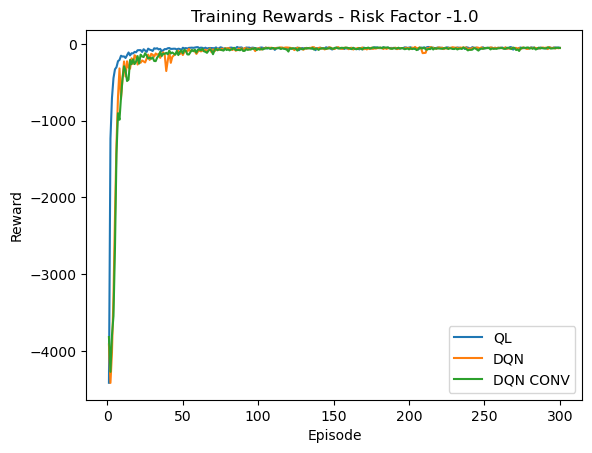

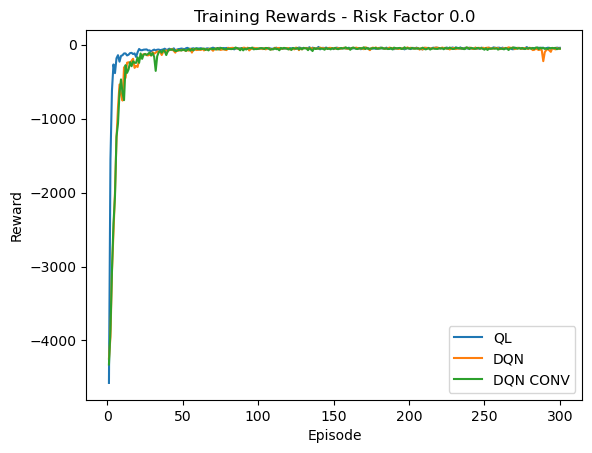

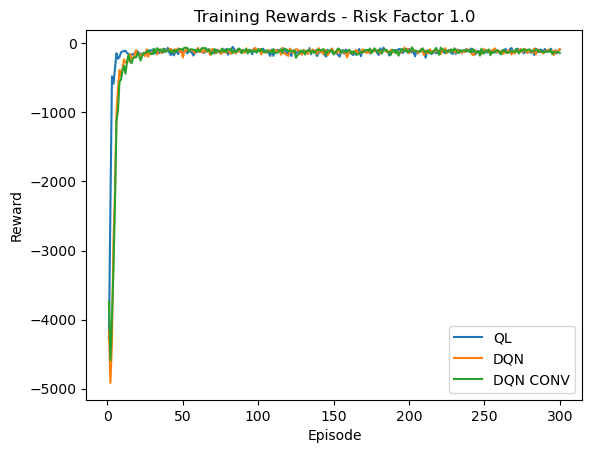

In [139]:
types = [
    {'k':'QL', 'n':'QL'},
    {'k':'DQN_CACHED', 'n':'DQN'},
    {'k':'DQN_CONV_CACHED', 'n':'DQN CONV'}
]

lambs = datadf['lamb'].unique()
lambs = [-1.0, 0.0, 1.0]

for lamb in lambs:
    for t in types:
        df = datadf[datadf['lamb'] == lamb][datadf['type'] == t['k']].groupby('episode').mean().reset_index()
        sd = datadf[datadf['lamb'] == lamb][datadf['type'] == t['k']].groupby('episode').std().reset_index()['rewards']
        #df = df[df['episode'] <= 30]
        x = df['episode']
        y = df['rewards']
        plt.plot(x, y, label= '{}'.format(t['n']))
        #plt.fill_between(x, (y-sd), (y+sd), alpha=0.5)
    plt.legend()
    plt.title('Training Rewards - Risk Factor {}'.format(lamb))
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

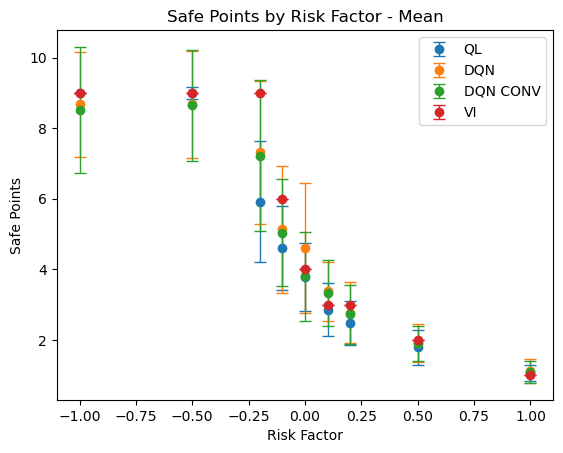

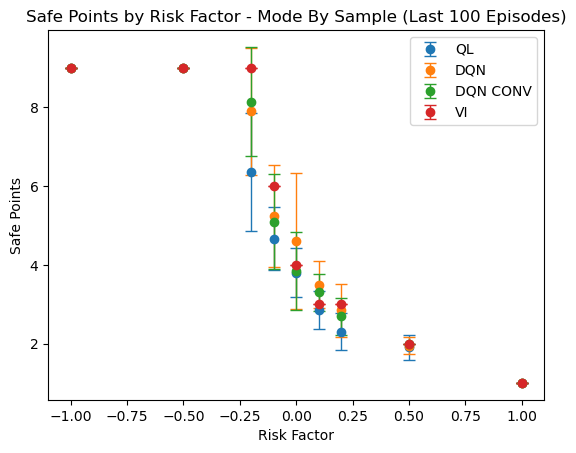

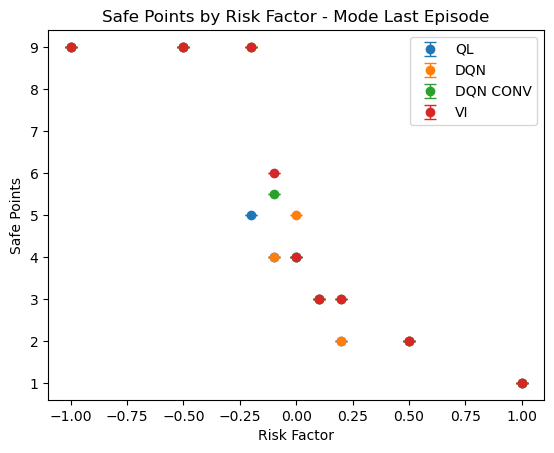

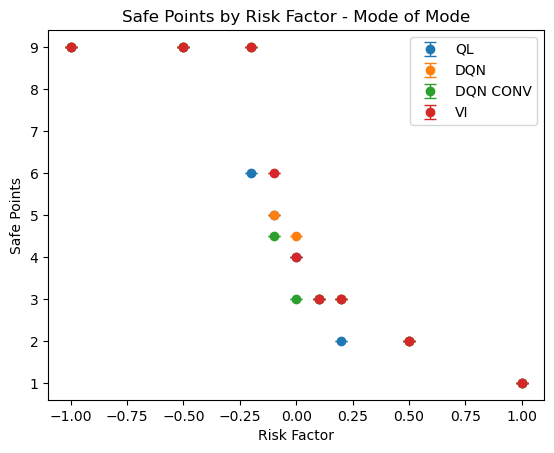

In [140]:
types = [
    {'k':'QL', 'n':'QL'},
    #{'k':'QL2', 'n':'QL2'},#first exeriment
    {'k':'DQN_CACHED', 'n':'DQN'},
    {'k':'DQN_CONV_CACHED', 'n':'DQN CONV'}
]

vi_099 = [9,9,9,6,4,3,3,2,1]
include_vi = True

for t in types:
    df = datadf[datadf['type'] == t['k']][datadf['episode'] > 200].groupby('lamb').mean().reset_index()
    sd = datadf[datadf['type'] == t['k']][datadf['episode'] > 200].groupby('lamb').std().reset_index()['safe_points']
    x = df['lamb']
    y = df['safe_points']
    #plt.errorbar(x, y, sd, linestyle='None', marker='.')
    
    plt.errorbar(x, y, sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=t['n'])

if include_vi:
    plt.errorbar(x, vi_099, np.zeros(len(vi_099)), linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"VI".format(d['label']))
    
plt.title('Safe Points by Risk Factor - Mean')
plt.xlabel('Risk Factor')
plt.ylabel('Safe Points')
plt.legend()
plt.show()

#moda para cada sample
for t in types:
    mode_df = datadf[datadf['type'] == t['k']][datadf['episode'] > 200].groupby(['lamb', 'sample']).safe_points.apply(lambda x: x.mode()).reset_index()
    df = mode_df.groupby('lamb').mean().reset_index()
    sd = mode_df.groupby('lamb').std().reset_index()['safe_points']
    x = df['lamb']
    y = df['safe_points']
    #plt.errorbar(x, y, sd, linestyle='None', marker='.')
    
    plt.errorbar(x, y, sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=t['n'])

if include_vi:
    plt.errorbar(x, vi_099, np.zeros(len(vi_099)), linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"VI".format(d['label']))

plt.title('Safe Points by Risk Factor - Mode By Sample (Last 100 Episodes)')
plt.xlabel('Risk Factor')
plt.ylabel('Safe Points')
plt.legend()
plt.show()

#moda para por modelo - ultima execucao
for t in types:
    mode_df = datadf[datadf['type'] == t['k']][datadf['episode'] == 300].groupby('lamb').safe_points.apply(lambda x: x.mode()).reset_index()
    df = mode_df.groupby('lamb').mean().reset_index()
    sd = mode_df.groupby('lamb').mean().reset_index()['safe_points']*0
    x = df['lamb']
    y = df['safe_points']
    #plt.errorbar(x, y, sd, linestyle='None', marker='.')
    
    plt.errorbar(x, y, sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=t['n'])

if include_vi:
    plt.errorbar(x, vi_099, np.zeros(len(vi_099)), linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"VI".format(d['label']))

plt.title('Safe Points by Risk Factor - Mode Last Episode')
plt.xlabel('Risk Factor')
plt.ylabel('Safe Points')
plt.legend()
plt.show()

#moda para por modelo
for t in types:
    mode_df = datadf[datadf['type'] == t['k']][datadf['episode'] > 200].groupby(['lamb', 'sample']).safe_points.apply(lambda x: x.mode()).reset_index()
    mode_df = mode_df.groupby('lamb').safe_points.apply(lambda x: x.mode()).reset_index()
    df = mode_df.groupby('lamb').mean().reset_index()
    sd = mode_df.groupby('lamb').mean().reset_index()['safe_points']*0
    x = df['lamb']
    y = df['safe_points']
    #plt.errorbar(x, y, sd, linestyle='None', marker='.')
    
    plt.errorbar(x, y, sd, linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=t['n'])

if include_vi:
    plt.errorbar(x, vi_099, np.zeros(len(vi_099)), linestyle='None', marker='o', capsize=4, elinewidth=1.0, label=r"VI".format(d['label']))
    
    
plt.title('Safe Points by Risk Factor - Mode of Mode')
plt.xlabel('Risk Factor')
plt.ylabel('Safe Points')
plt.legend()
plt.show()

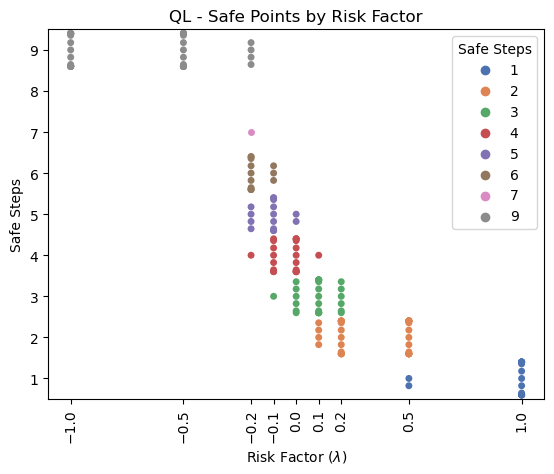

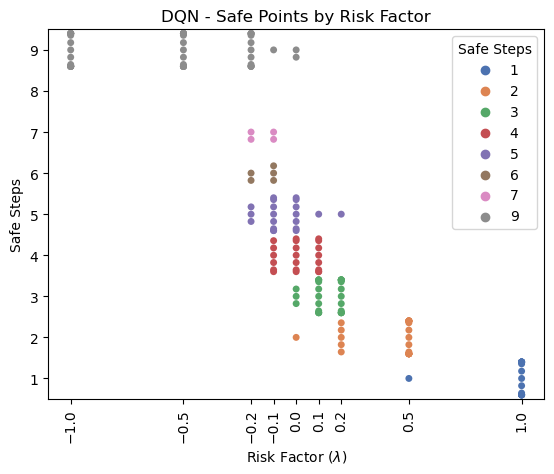

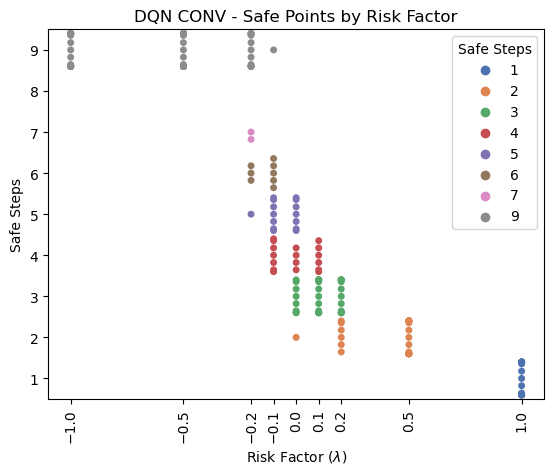

In [141]:
for t in types:
    df = datadf[datadf['type'] == t['k']][datadf['episode'] > 200].groupby(['lamb', 'sample']).safe_points.apply(lambda x: x.mode()).reset_index()
    df = df.rename(columns={"lamb": r"Risk Factor ($\lambda$)", "safe_points": "Safe Steps"})

    sns.swarmplot(data=df, order="987654321", y="Safe Steps", x="Risk Factor ($\lambda$)", hue="Safe Steps",dodge=False, palette="deep", legend=True, orient="h")

    plt.title("{} - Safe Points by Risk Factor".format(t['n']))
    plt.xticks(df['Risk Factor ($\lambda$)'].unique(), rotation=90)
    plt.show()



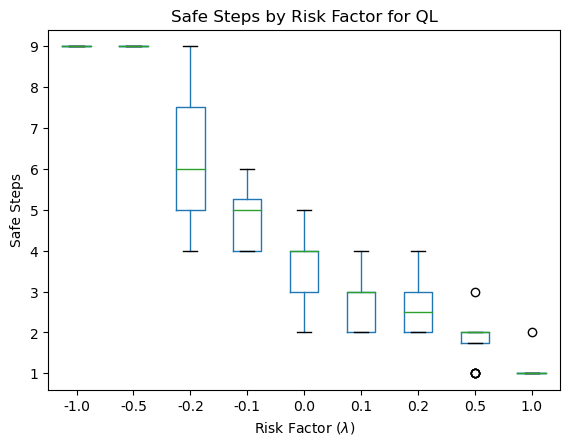

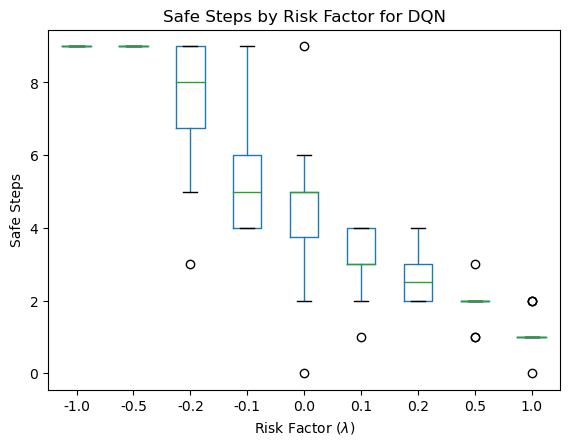

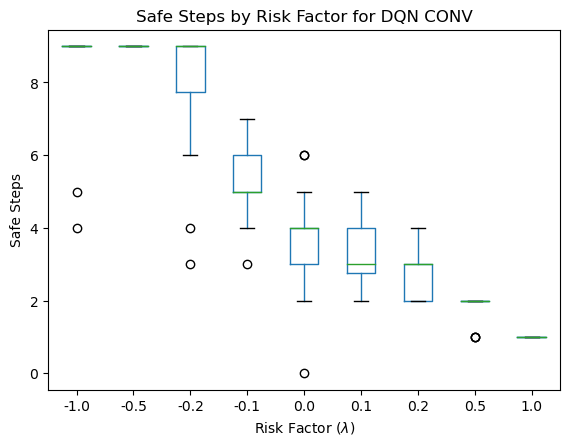

In [21]:
for t in types:
    datadf[datadf['episode'] == 300][datadf['type'] == t['k']].rename(columns={"lamb": r"Risk Factor ($\lambda$)", "safe_points": "Safe Steps"}).boxplot(by=r"Risk Factor ($\lambda$)" , column='Safe Steps', grid=False)
    plt.title('Safe Steps by Risk Factor for {}'.format(t['n']))
    plt.suptitle('')
    plt.ylabel('Safe Steps')
    plt.show()

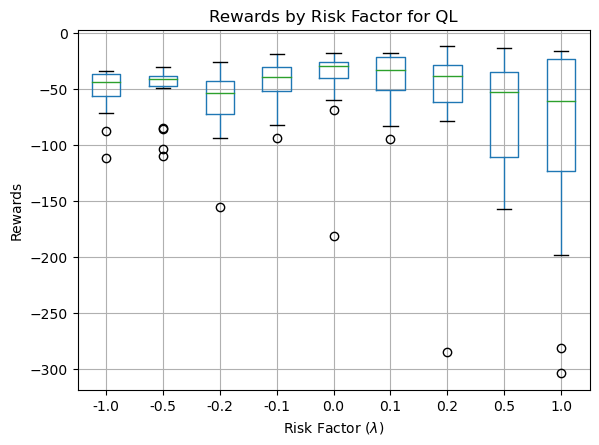

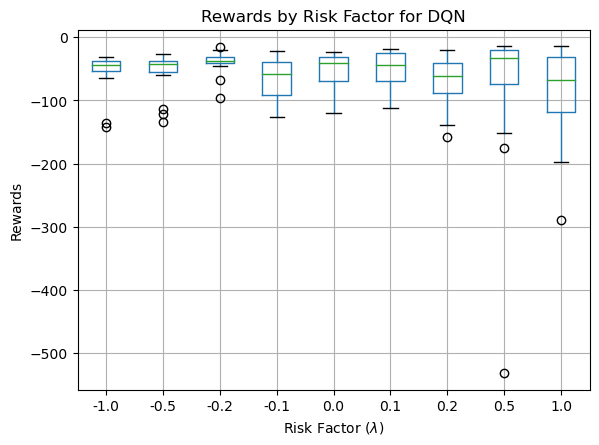

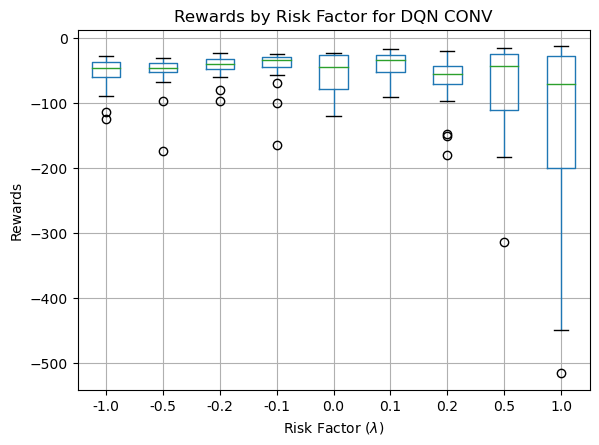

In [17]:
for t in types:
    datadf.rename(columns={"lamb": r"Risk Factor ($\lambda$)", "rewards": "Rewards"})[datadf['episode'] == 300][datadf['type'] == t['k']].boxplot(by=r"Risk Factor ($\lambda$)" , column='Rewards')
    plt.title('Rewards by Risk Factor for {}'.format(t['n']))
    plt.suptitle('')
    plt.ylabel('Rewards')
    plt.show()

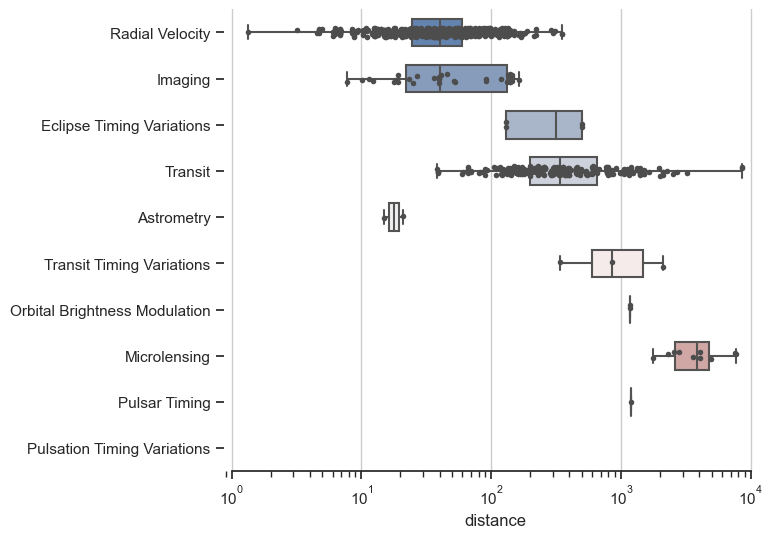

In [143]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)